# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#installing the required version of Matplotlib (3.10.0)
!pip install matplotlib==3.10.0
print("matplotlib version:", plt.matplotlib.__version__)




In [ ]:
# Import the libraries you will be using for analysis



In [ ]:
# Recommended versions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

In [ ]:
#You will see twelve files, one for each month.
#The files are 
#yellow_tripdata_2023-01.parquet
#yellow_tripdata_2023-02.parquet
#yellow_tripdata_2023-03.parquet
#yellow_tripdata_2023-04.parquet
#yellow_tripdata_2023-05.parquet
#yellow_tripdata_2023-06.parquet
#yellow_tripdata_2023-07.parquet
#yellow_tripdata_2023-08.parquet
#yellow_tripdata_2023-09.parquet
#yellow_tripdata_2023-10.parquet
#yellow_tripdata_2023-11.parquet
#yellow_tripdata_2023-12.parquet

#Observation --> All files above are of more than 45 MB size 

#To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

#`df = pd.read_parquet('file.parquet')`

In [ ]:
import os
#os.getcwd()
#get current wrking directory ,it is C:\\Users\\itstu\\anaconda_projects
#move all the NYC taxi data files to the current working directory to avoid FILE NOT FOUND ERRROR

# Try loading one file with Jan data to understand its attributes & number of records
df = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-01.parquet')
df.info()
df.describe()


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
#import os

# Select the folder having data files
#os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
#file_list = os.listdir()

# initialise an empty dataframe
#df = pd.DataFrame()


# iterate through the list of files and sample one by one:
#for file_name in file_list:
#    try:
        # file path for the current file
#        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
#        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
#        df = # we initialised this empty DF earlier

#    except Exception as e:
#        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

In [ ]:
# on executing df. info() it is evident that each dataset has a large amount of row/data , so it will make sense to extract fraction of data from each data set

In [ ]:
#df.info()

In [ ]:
#As this needs to be done for all the 12 datasets let us rename the df appropriately
#df_jan = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-01.parquet')
#df_jan.info()

In [ ]:
#jan_filtered_df.info()



In [ ]:
import random
def get_monthly_random_hour(df,date_column,fraction=0.05, random_state=42):
    
#create new columns within the dataframe for date & hour
    df['date'] = df[date_column].dt.date
    df['hour'] = df[date_column].dt.hour

    selected_trips = []
    for date in df['date'].unique():
        for hour in range(24):
            trips_in_hour = df[(df['date'] == date) & (df['hour'] == hour)]
            num_trips = len(trips_in_hour)
            
            if num_trips > 0:
#                fraction = random.uniform(0, 1)
                num_to_select = int(num_trips * fraction)
                
                # Ensure that the selection is within the bounds of available trips
                num_to_select = min(num_to_select, num_trips)
                
                selected_indices = random.sample(trips_in_hour.index.tolist(), num_to_select)
                selected_trips.extend(selected_indices)
    
    return df.loc[selected_trips]


   
print("End of function")   

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
jan_filtered_df = ''
print("Begin for Jan")
df_jan = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-01.parquet')
print("Before Filtering")
jan_filtered_df=get_monthly_random_hour(df_jan,'tpep_pickup_datetime')
print("Success")


print("Success for jan")
print("End for Jan")

In [ ]:
df_jan.info()

In [ ]:
jan_filtered_df.info()

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 5% data
print("Begin for feb")
df_feb = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-02.parquet')
feb_filtered_df= get_monthly_random_hour(df_feb,'tpep_pickup_datetime')
print("Success for Feb")
print("End for Feb")

In [ ]:
df_feb.info()

In [ ]:
feb_filtered_df.info()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Mar")
df_mar = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-03.parquet')
mar_filtered_df=get_monthly_random_hour(df_mar,'tpep_pickup_datetime')
print("Success for Mar")
print("End for Mar")

In [ ]:
df_mar.info()

In [ ]:
mar_filtered_df.info()

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Apr")
df_apr = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-04.parquet')
apr_filtered_df= get_monthly_random_hour(df_apr,'tpep_pickup_datetime')
print("Success for Apr")
print("End for Apr")

In [ ]:
df_apr.info()

In [ ]:
apr_filtered_df.info()

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for May")
df_may = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-05.parquet')
may_filtered_df= get_monthly_random_hour(df_may,'tpep_pickup_datetime')
print("Success for May")
print("End for May")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Jun")
df_jun = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-06.parquet')
jun_filtered_df= get_monthly_random_hour(df_jun,'tpep_pickup_datetime')
print("Success for Jun")
print("End for Jun")

In [ ]:
df_jun.info()

In [ ]:
jun_filtered_df.info()

In [ ]:
jun_filtered_df.head()


In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Jul")
df_jul = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-07.parquet')
jul_filtered_df= get_monthly_random_hour(df_jul,'tpep_pickup_datetime')
print("Success for Jul")
print("End for Jul")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Aug")
df_aug = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-08.parquet')
aug_filtered_df= get_monthly_random_hour(df_aug,'tpep_pickup_datetime')
print("Success for Aug")
print("End for Aug")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Sep")
df_sep = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-09.parquet')
sep_filtered_df= get_monthly_random_hour(df_sep,'tpep_pickup_datetime')
print("Success for Sep")
print("End for Sep")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Oct")
df_oct = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-10.parquet')
oct_filtered_df= get_monthly_random_hour(df_oct,'tpep_pickup_datetime')
print("Success for Oct")
print("End for Oct")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Nov")
df_nov = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-11.parquet')
nov_filtered_df= get_monthly_random_hour(df_nov,'tpep_pickup_datetime')
print("Success for Nov")
print("End for Nov")

In [ ]:
#extracting dataframes for all the given monthly files and filtering the 10% data
print("Begin for Dec")
df_dec = pd.read_parquet('C:\\Users\\itstu\\anaconda_projects\\yellow_tripdata_2023-12.parquet')
dec_filtered_df= get_monthly_random_hour(df_dec,'tpep_pickup_datetime')
print("Success for Dec")
print("End for Dec")

In [ ]:
#Appending all the dataframes to a list

print("Begin of append of filtered df to a list")
df_before_merge = []
df_before_merge.append(jan_filtered_df)
df_before_merge.append(feb_filtered_df)
df_before_merge.append(mar_filtered_df)
df_before_merge.append(apr_filtered_df)
df_before_merge.append(may_filtered_df)
df_before_merge.append(jun_filtered_df)
df_before_merge.append(jul_filtered_df)
df_before_merge.append(aug_filtered_df)
df_before_merge.append(sep_filtered_df)
df_before_merge.append(oct_filtered_df)
df_before_merge.append(nov_filtered_df)
df_before_merge.append(dec_filtered_df)

print("End of append of filtered df to a list")
#result = pd.concat(frames)

print("Merge Begin")
merged_df = pd.concat(df_before_merge)
print("Merge End")


In [ ]:
merged_df.info()


In [ ]:
#Converting the merged DF to CSV
merged_df.to_csv('output.csv', index=True)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [1]:
import pandas as pd
# Load the new data file (output.csv) to the new DF(final_df)

final_df = pd.read_csv('C:\\Users\\itstu\\anaconda_projects\\output.csv')



In [2]:
# df.head()
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:30:23   2023-01-01 00:34:11              1.0   
1         2  2023-01-01 00:13:33   2023-01-01 00:38:08              2.0   
2         2  2023-01-01 00:48:17   2023-01-01 00:58:54              1.0   
3         2  2023-01-01 00:13:12   2023-01-01 00:28:58              1.0   
4         2  2023-01-01 00:13:21   2023-01-01 00:19:45              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.81         1.0                  N           236           141   
1          11.91         1.0                  N           132             9   
2           1.12         1.0                  N           249           231   
3           4.16         1.0                  N           107           262   
4           1.73         1.0                  N           137           141   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.16           0.0   
1             4  ...     -0.5        0.00           0.0   
2             1  ...      0.5        1.64           0.0   
3             1  ...      0.5        6.20           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         12.96                   2.5         0.00   
1                   -1.0        -49.45                   0.0        -1.25   
2                    1.0         18.04                   2.5         0.00   
3                    1.0         31.00                   2.5         0.00   
4                    1.0         18.00                   2.5         0.00   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [3]:
# df.info()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911241 entries, 0 to 1911240
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  date                   object 
 20  hour                   int64  
 21  Airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [6]:
# Fixing Columns for DF final_df
# Exploring the dataset 
final_df.shape


(1911241, 22)

In [7]:
# The DF has 1911241 records and 22 Columns

In [8]:
# exploring the columns in the DF
final_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee'],
      dtype='object')

In [9]:
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:30:23   2023-01-01 00:34:11              1.0   
1         2  2023-01-01 00:13:33   2023-01-01 00:38:08              2.0   
2         2  2023-01-01 00:48:17   2023-01-01 00:58:54              1.0   
3         2  2023-01-01 00:13:12   2023-01-01 00:28:58              1.0   
4         2  2023-01-01 00:13:21   2023-01-01 00:19:45              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.81         1.0                  N           236           141   
1          11.91         1.0                  N           132             9   
2           1.12         1.0                  N           249           231   
3           4.16         1.0                  N           107           262   
4           1.73         1.0                  N           137           141   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        2.16           0.0   
1             4  ...     -0.5        0.00           0.0   
2             1  ...      0.5        1.64           0.0   
3             1  ...      0.5        6.20           0.0   
4             1  ...      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         12.96                   2.5         0.00   
1                   -1.0        -49.45                   0.0        -1.25   
2                    1.0         18.04                   2.5         0.00   
3                    1.0         31.00                   2.5         0.00   
4                    1.0         18.00                   2.5         0.00   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [10]:
# exploring the data types of each of the columns in the DF
final_df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
airport_fee              float64
date                      object
hour                       int64
Airport_fee              float64
dtype: object

In [11]:
#check if there are any null values 
final_df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            65688
trip_distance                  0
RatecodeID                 65688
store_and_fwd_flag         65688
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       65688
airport_fee              1761889
date                           0
hour                           0
Airport_fee               215040
dtype: int64

In [12]:
# passenger_count, RatecodeID ,store_and_fwd_flag,congestion_surcharge ,airport_fee,  Airport_fee  have null values 
#we will have to see if there is a need to impute
#airport_fee  &  Airport_fee are 2 columns with the same name , we need to analyze of they need to be merged or dropped                          

In [13]:
#Observations
#1.tpep_pickup_datetime & tpep_dropoff_datetime are of type object and need to be converted to datetime
#2.we will have to analyze if any new columns need to be created from tpep_pickup_datetime & tpep_dropoff_datetime, also if the date & hour 
#columns need conversion
# Converting tpep_pickup_datetime & tpep_dropoff_datetime from object to datetime
final_df['tpep_pickup_datetime']=pd.to_datetime(final_df['tpep_pickup_datetime'])
final_df['tpep_dropoff_datetime']=pd.to_datetime(final_df['tpep_dropoff_datetime'])

In [14]:
final_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
date                             object
hour                              int64
Airport_fee                     float64
dtype: object

In [15]:
#creating more columns based on the pickup and dropoff date columns 
final_df['pickup_day']=final_df['tpep_pickup_datetime'].dt.day_name()
final_df['dropoff_day']=final_df['tpep_dropoff_datetime'].dt.day_name()
final_df['pickup_day_no']=final_df['tpep_pickup_datetime'].dt.weekday
final_df['dropoff_day_no']=final_df['tpep_dropoff_datetime'].dt.weekday
final_df['pickup_hour']=final_df['tpep_pickup_datetime'].dt.hour
final_df['dropoff_hour']=final_df['tpep_dropoff_datetime'].dt.hour
final_df['pickup_month']=final_df['tpep_dropoff_datetime'].dt.month
final_df['dropoff_month']=final_df['tpep_dropoff_datetime'].dt.month

In [16]:
final_df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
date                             object
hour                              int64
Airport_fee                     float64
pickup_day                       object
dropoff_day                      object
pickup_day_no                     int32


In [17]:
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:30:23   2023-01-01 00:34:11              1.0   
1         2  2023-01-01 00:13:33   2023-01-01 00:38:08              2.0   
2         2  2023-01-01 00:48:17   2023-01-01 00:58:54              1.0   
3         2  2023-01-01 00:13:12   2023-01-01 00:28:58              1.0   
4         2  2023-01-01 00:13:21   2023-01-01 00:19:45              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.81         1.0                  N           236           141   
1          11.91         1.0                  N           132             9   
2           1.12         1.0                  N           249           231   
3           4.16         1.0                  N           107           262   
4           1.73         1.0                  N           137           141   

   payment_type  ...  hour  Airport_fee  pickup_day  dropoff_day  \
0             1  ...     0          NaN      Sunday       Sunday   
1             4  ...     0          NaN      Sunday       Sunday   
2             1  ...     0          NaN      Sunday       Sunday   
3             1  ...     0          NaN      Sunday       Sunday   
4             1  ...     0          NaN      Sunday       Sunday   

   pickup_day_no  dropoff_day_no  pickup_hour  dropoff_hour  pickup_month  \
0              6               6            0             0             1   
1              6               6            0             0             1   
2              6               6            0             0             1   
3              6               6            0             0             1   
4              6               6            0             0             1   

  dropoff_month  
0             1  
1             1  
2             1  
3             1  
4             1  

[5 rows x 30 columns]

In [18]:
#function to define when was the ride taken (Morning/Afternoon/Evening/Late Night)
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [19]:
#applying the above function pickup and dropoff hour and creating new columns
final_df['pickup_timeofday']=final_df['pickup_hour'].map(time_of_day)
final_df['dropoff_timeofday']=final_df['dropoff_hour'].map(time_of_day)

In [20]:
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:30:23   2023-01-01 00:34:11              1.0   
1         2  2023-01-01 00:13:33   2023-01-01 00:38:08              2.0   
2         2  2023-01-01 00:48:17   2023-01-01 00:58:54              1.0   
3         2  2023-01-01 00:13:12   2023-01-01 00:28:58              1.0   
4         2  2023-01-01 00:13:21   2023-01-01 00:19:45              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.81         1.0                  N           236           141   
1          11.91         1.0                  N           132             9   
2           1.12         1.0                  N           249           231   
3           4.16         1.0                  N           107           262   
4           1.73         1.0                  N           137           141   

   payment_type  ...  pickup_day  dropoff_day  pickup_day_no  dropoff_day_no  \
0             1  ...      Sunday       Sunday              6               6   
1             4  ...      Sunday       Sunday              6               6   
2             1  ...      Sunday       Sunday              6               6   
3             1  ...      Sunday       Sunday              6               6   
4             1  ...      Sunday       Sunday              6               6   

   pickup_hour  dropoff_hour  pickup_month  dropoff_month  pickup_timeofday  \
0            0             0             1              1        Late night   
1            0             0             1              1        Late night   
2            0             0             1              1        Late night   
3            0             0             1              1        Late night   
4            0             0             1              1        Late night   

  dropoff_timeofday  
0        Late night  
1        Late night  
2        Late night  
3        Late night  
4        Late night  

[5 rows x 32 columns]

In [21]:
final_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday'],
      dtype='object')

In [22]:
pd.set_option('display.max_columns', None)

In [23]:
final_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:30:23   2023-01-01 00:34:11              1.0   
1         2  2023-01-01 00:13:33   2023-01-01 00:38:08              2.0   
2         2  2023-01-01 00:48:17   2023-01-01 00:58:54              1.0   
3         2  2023-01-01 00:13:12   2023-01-01 00:28:58              1.0   
4         2  2023-01-01 00:13:21   2023-01-01 00:19:45              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.81         1.0                  N           236           141   
1          11.91         1.0                  N           132             9   
2           1.12         1.0                  N           249           231   
3           4.16         1.0                  N           107           262   
4           1.73         1.0                  N           137           141   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1          5.8    1.0      0.5        2.16           0.0   
1             4        -45.7   -1.0     -0.5        0.00           0.0   
2             1         11.4    1.0      0.5        1.64           0.0   
3             1         19.8    1.0      0.5        6.20           0.0   
4             1         10.0    1.0      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         12.96                   2.5         0.00   
1                   -1.0        -49.45                   0.0        -1.25   
2                    1.0         18.04                   2.5         0.00   
3                    1.0         31.00                   2.5         0.00   
4                    1.0         18.00                   2.5         0.00   

         date  hour  Airport_fee pickup_day dropoff_day  pickup_day_no  \
0  2023-01-01     0          NaN     Sunday      Sunday              6   
1  2023-01-01     0          NaN     Sunday      Sunday              6   
2  2023-01-01     0          NaN     Sunday      Sunday              6   
3  2023-01-01     0          NaN     Sunday      Sunday              6   
4  2023-01-01     0          NaN     Sunday      Sunday              6   

   dropoff_day_no  pickup_hour  dropoff_hour  pickup_month  dropoff_month  \
0               6            0             0             1              1   
1               6            0             0             1              1   
2               6            0             0             1              1   
3               6            0             0             1              1   
4               6            0             0             1              1   

  pickup_timeofday dropoff_timeofday  
0       Late night        Late night  
1       Late night        Late night  
2       Late night        Late night  
3       Late night        Late night  
4       Late night        Late night

In [24]:
# Fix the index and drop any columns that are not needed

final_df = final_df.reset_index()

In [25]:
final_df.info

<bound method DataFrame.info of            index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1              1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2              2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3              3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
4              4         2  2023-01-01 00:13:21   2023-01-01 00:19:45   
...          ...       ...                  ...                   ...   
1911236  1911236         2  2023-12-31 23:15:17   2023-12-31 23:30:54   
1911237  1911237         1  2023-12-31 23:56:08   2024-01-01 00:00:25   
1911238  1911238         2  2023-12-31 23:13:51   2023-12-31 23:21:11   
1911239  1911239         1  2023-12-31 23:29:58   2023-12-31 23:46:57   
1911240  1911240         1  2023-12-31 23:15:50   2023-12-31 23:26:23   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [27]:
final_df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1      1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2      2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3      3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
4      4         2  2023-01-01 00:13:21   2023-01-01 00:19:45   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.81         1.0                  N   
1              2.0          11.91         1.0                  N   
2              1.0           1.12         1.0                  N   
3              1.0           4.16         1.0                  N   
4              2.0           1.73         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           236           141             1          5.8    1.0      0.5   
1           132             9             4        -45.7   -1.0     -0.5   
2           249           231             1         11.4    1.0      0.5   
3           107           262             1         19.8    1.0      0.5   
4           137           141             1         10.0    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.16           0.0                    1.0         12.96   
1        0.00           0.0                   -1.0        -49.45   
2        1.64           0.0                    1.0         18.04   
3        6.20           0.0                    1.0         31.00   
4        3.00           0.0                    1.0         18.00   

   congestion_surcharge  airport_fee        date  hour  Airport_fee  \
0                   2.5         0.00  2023-01-01     0          NaN   
1                   0.0        -1.25  2023-01-01     0          NaN   
2                   2.5         0.00  2023-01-01     0          NaN   
3                   2.5         0.00  2023-01-01     0          NaN   
4                   2.5         0.00  2023-01-01     0          NaN   

  pickup_day dropoff_day  pickup_day_no  dropoff_day_no  pickup_hour  \
0     Sunday      Sunday              6               6            0   
1     Sunday      Sunday              6               6            0   
2     Sunday      Sunday              6               6            0   
3     Sunday      Sunday              6               6            0   
4     Sunday      Sunday              6               6            0   

   dropoff_hour  pickup_month  dropoff_month pickup_timeofday  \
0             0             1              1       Late night   
1             0             1              1       Late night   
2             0             1              1       Late night   
3             0             1              1       Late night   
4             0             1              1       Late night   

  dropoff_timeofday  
0        Late night  
1        Late night  
2        Late night  
3        Late night  
4        Late night

In [28]:
# Combine the two airport fee columns

#final_df.dtypes
final_df['Merged_Airport_fee'] = final_df['Airport_fee'].astype(str) + final_df['airport_fee'].astype(str)


In [29]:
final_df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1      1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2      2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3      3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
4      4         2  2023-01-01 00:13:21   2023-01-01 00:19:45   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.81         1.0                  N   
1              2.0          11.91         1.0                  N   
2              1.0           1.12         1.0                  N   
3              1.0           4.16         1.0                  N   
4              2.0           1.73         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           236           141             1          5.8    1.0      0.5   
1           132             9             4        -45.7   -1.0     -0.5   
2           249           231             1         11.4    1.0      0.5   
3           107           262             1         19.8    1.0      0.5   
4           137           141             1         10.0    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.16           0.0                    1.0         12.96   
1        0.00           0.0                   -1.0        -49.45   
2        1.64           0.0                    1.0         18.04   
3        6.20           0.0                    1.0         31.00   
4        3.00           0.0                    1.0         18.00   

   congestion_surcharge  airport_fee        date  hour  Airport_fee  \
0                   2.5         0.00  2023-01-01     0          NaN   
1                   0.0        -1.25  2023-01-01     0          NaN   
2                   2.5         0.00  2023-01-01     0          NaN   
3                   2.5         0.00  2023-01-01     0          NaN   
4                   2.5         0.00  2023-01-01     0          NaN   

  pickup_day dropoff_day  pickup_day_no  dropoff_day_no  pickup_hour  \
0     Sunday      Sunday              6               6            0   
1     Sunday      Sunday              6               6            0   
2     Sunday      Sunday              6               6            0   
3     Sunday      Sunday              6               6            0   
4     Sunday      Sunday              6               6            0   

   dropoff_hour  pickup_month  dropoff_month pickup_timeofday  \
0             0             1              1       Late night   
1             0             1              1       Late night   
2             0             1              1       Late night   
3             0             1              1       Late night   
4             0             1              1       Late night   

  dropoff_timeofday Merged_Airport_fee  
0        Late night             nan0.0  
1        Late night           nan-1.25  
2        Late night             nan0.0  
3        Late night             nan0.0  
4        Late night             nan0.0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [31]:
# check where values of fare amount are negative

negative_values_df = final_df[final_df['fare_amount'] < 0]
negative_values_df.head()

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1        1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
139    139         2  2023-01-01 00:20:18   2023-01-01 00:27:56   
240    240         2  2023-01-01 00:33:47   2023-01-01 00:39:39   
243    243         2  2023-01-01 00:58:43   2023-01-01 01:40:36   
301    301         2  2023-01-01 01:13:55   2023-01-01 01:20:25   

     passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
1                2.0          11.91         1.0                  N   
139              2.0           1.19         1.0                  N   
240              2.0           1.21         1.0                  N   
243              2.0          12.82         1.0                  N   
301              1.0           1.31         1.0                  N   

     PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
1             132             9             4        -45.7   -1.0     -0.5   
139           142            50             4         -9.3   -1.0     -0.5   
240           163           170             4         -8.6   -1.0     -0.5   
243            68           228             4        -55.5   -1.0     -0.5   
301           239           141             4         -9.3   -1.0     -0.5   

     tip_amount  tolls_amount  improvement_surcharge  total_amount  \
1           0.0           0.0                   -1.0        -49.45   
139         0.0           0.0                   -1.0        -14.30   
240         0.0           0.0                   -1.0        -13.60   
243         0.0           0.0                   -1.0        -60.50   
301         0.0           0.0                   -1.0        -14.30   

     congestion_surcharge  airport_fee        date  hour  Airport_fee  \
1                     0.0        -1.25  2023-01-01     0          NaN   
139                  -2.5         0.00  2023-01-01     0          NaN   
240                  -2.5         0.00  2023-01-01     0          NaN   
243                  -2.5         0.00  2023-01-01     0          NaN   
301                  -2.5         0.00  2023-01-01     1          NaN   

    pickup_day dropoff_day  pickup_day_no  dropoff_day_no  pickup_hour  \
1       Sunday      Sunday              6               6            0   
139     Sunday      Sunday              6               6            0   
240     Sunday      Sunday              6               6            0   
243     Sunday      Sunday              6               6            0   
301     Sunday      Sunday              6               6            1   

     dropoff_hour  pickup_month  dropoff_month pickup_timeofday  \
1               0             1              1       Late night   
139             0             1              1       Late night   
240             0             1              1       Late night   
243             1             1              1       Late night   
301             1             1              1       Late night   

    dropoff_timeofday Merged_Airport_fee  
1          Late night           nan-1.25  
139        Late night             nan0.0  
240        Late night             nan0.0  
243        Late night             nan0.0  
301        Late night             nan0.0

Did you notice something different in the `RatecodeID` column for above records?

In [33]:
# Analyse RatecodeID for the negative fare amounts
value_counts = negative_values_df['RatecodeID'].value_counts()
print(value_counts)



RatecodeID
1.0    16822
2.0     1242
5.0      322
3.0      194
4.0       95
Name: count, dtype: int64


In [34]:
#The RatecodeID 1 (Standard Rate) has maximum records where fare amounts are negative , this might be due to refund of data by the taxi service 
#due to unsastisfactory service reported by the customer or due to system error but it an alarming number  

In [35]:
final_df.dtypes

index                             int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
date                             object
hour                              int64
Airport_fee                     float64
pickup_day                       object
dropoff_day                      object


In [36]:
# Find which monetary columns have negative values
# Monetary columns : fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,airport_fee,Airport_fee,Merged_Airport_fee 
list_monetary_cols = ['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','airport_fee','Airport_fee']
results = {}
for col in list_monetary_cols:
  if col in final_df.columns:
      results[col] = (final_df[col] < 0).any()
  else:
      results[col]

print(results)


{'fare_amount': True, 'extra': True, 'mta_tax': True, 'tip_amount': True, 'tolls_amount': True, 'improvement_surcharge': True, 'total_amount': True, 'airport_fee': True, 'Airport_fee': True}


In [37]:
# Describe specific column
description_col1 = final_df['fare_amount'].describe()
print("\nDescription of col1:\n", description_col1)


Description of col1:
 count    1.911241e+06
mean     1.949993e+01
std      1.901776e+01
min     -7.540500e+02
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      2.320110e+03
Name: fare_amount, dtype: float64


In [38]:
description_col1 = final_df['extra'].describe()
print("\nDescription of col1:\n", description_col1)


Description of col1:
 count    1.911241e+06
mean     1.557508e+00
std      1.842418e+00
min     -7.500000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.500000e+00
max      6.500000e+01
Name: extra, dtype: float64


In [39]:
# fix these negative values
neg_monetary_cols = ['fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','airport_fee','Airport_fee']
final_df[neg_monetary_cols] = final_df[neg_monetary_cols].mask(final_df[neg_monetary_cols] < 0, 0)
final_df.head()


index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1      1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2      2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3      3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
4      4         2  2023-01-01 00:13:21   2023-01-01 00:19:45   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.81         1.0                  N   
1              2.0          11.91         1.0                  N   
2              1.0           1.12         1.0                  N   
3              1.0           4.16         1.0                  N   
4              2.0           1.73         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           236           141             1          5.8    1.0      0.5   
1           132             9             4          0.0    0.0      0.0   
2           249           231             1         11.4    1.0      0.5   
3           107           262             1         19.8    1.0      0.5   
4           137           141             1         10.0    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.16           0.0                    1.0         12.96   
1        0.00           0.0                    0.0          0.00   
2        1.64           0.0                    1.0         18.04   
3        6.20           0.0                    1.0         31.00   
4        3.00           0.0                    1.0         18.00   

   congestion_surcharge  airport_fee        date  hour  Airport_fee  \
0                   2.5          0.0  2023-01-01     0          NaN   
1                   0.0          0.0  2023-01-01     0          NaN   
2                   2.5          0.0  2023-01-01     0          NaN   
3                   2.5          0.0  2023-01-01     0          NaN   
4                   2.5          0.0  2023-01-01     0          NaN   

  pickup_day dropoff_day  pickup_day_no  dropoff_day_no  pickup_hour  \
0     Sunday      Sunday              6               6            0   
1     Sunday      Sunday              6               6            0   
2     Sunday      Sunday              6               6            0   
3     Sunday      Sunday              6               6            0   
4     Sunday      Sunday              6               6            0   

   dropoff_hour  pickup_month  dropoff_month pickup_timeofday  \
0             0             1              1       Late night   
1             0             1              1       Late night   
2             0             1              1       Late night   
3             0             1              1       Late night   
4             0             1              1       Late night   

  dropoff_timeofday Merged_Airport_fee  
0        Late night             nan0.0  
1        Late night           nan-1.25  
2        Late night             nan0.0  
3        Late night             nan0.0  
4        Late night             nan0.0

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [42]:
# Find the proportion of missing values in each column
proportion_of_missing_values = final_df.isnull().sum() / len(final_df)
print(proportion_of_missing_values)


index                    0.000000
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034369
trip_distance            0.000000
RatecodeID               0.034369
store_and_fwd_flag       0.034369
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034369
airport_fee              0.921856
date                     0.000000
hour                     0.000000
Airport_fee              0.112513
pickup_day               0.000000
dropoff_day              0.000000
pickup_day_no            0.000000
dropoff_day_no           0.000000
pickup_hour              0.000000
dropoff_hour             0.000000
pickup_month  

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [44]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_values_psngr_count = final_df[final_df['passenger_count'].isnull()]
print(null_values_psngr_count)


           index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
12            12         2  2023-01-01 00:37:00   2023-01-01 00:58:00   
26            26         2  2023-01-01 00:32:00   2023-01-01 01:05:00   
31            31         2  2023-01-01 00:00:00   2023-01-01 00:08:00   
52            52         2  2023-01-01 00:50:00   2023-01-01 01:15:00   
63            63         2  2023-01-01 00:44:03   2023-01-01 01:13:49   
...          ...       ...                  ...                   ...   
1911212  1911212         1  2023-12-31 23:14:57   2023-12-31 23:31:17   
1911213  1911213         1  2023-12-31 23:27:01   2023-12-31 23:39:56   
1911215  1911215         1  2023-12-31 23:38:44   2023-12-31 23:55:14   
1911231  1911231         2  2023-12-31 23:36:29   2023-12-31 23:42:26   
1911232  1911232         2  2023-12-31 23:23:07   2023-12-31 23:31:40   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
12                   NaN           4.12         N

Did you find zeroes in passenger_count? Handle these.

In [46]:
#df['col1'].describe()
# find rows where passenger_count is zero
psngr_rows_with_zero = final_df[final_df['passenger_count'] == 0]
print(psngr_rows_with_zero)
#29186 rows


           index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
549          549         1  2023-01-01 01:39:51   2023-01-01 01:50:16   
626          626         1  2023-01-01 02:50:56   2023-01-01 03:01:02   
658          658         1  2023-01-01 02:17:06   2023-01-01 02:51:24   
710          710         1  2023-01-01 02:26:10   2023-01-01 02:32:35   
858          858         1  2023-01-01 03:27:46   2023-01-01 03:39:53   
...          ...       ...                  ...                   ...   
1910869  1910869         1  2023-12-31 22:05:32   2023-12-31 22:11:36   
1910946  1910946         1  2023-12-31 22:58:47   2023-12-31 23:05:51   
1911008  1911008         1  2023-12-31 22:52:28   2023-12-31 23:00:45   
1911102  1911102         1  2023-12-31 23:01:38   2023-12-31 23:16:46   
1911107  1911107         1  2023-12-31 23:15:53   2023-12-31 23:37:43   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
549                  0.0            1.7         1

In [47]:
# Column to replace zeros in
column_name = 'passenger_count'

# Calculate the mode of the column
mode_value = final_df[column_name].mode()[0]

# Replace 0 with the mode value
final_df[column_name] = final_df[column_name].replace(0, mode_value)

In [48]:
# Find rows where 'passenger_count' is equal to 1.0(mode value)
value_to_find = 1.0
filtered_df = final_df[final_df['passenger_count'] == value_to_find]

# Print the filtered DataFrame
print(filtered_df)

           index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
2              2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3              3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
5              5         2  2023-01-01 00:45:23   2023-01-01 01:09:43   
6              6         2  2023-01-01 00:14:37   2023-01-01 00:31:51   
...          ...       ...                  ...                   ...   
1911233  1911233         2  2023-12-31 23:14:49   2023-12-31 23:16:57   
1911237  1911237         1  2023-12-31 23:56:08   2024-01-01 00:00:25   
1911238  1911238         2  2023-12-31 23:13:51   2023-12-31 23:21:11   
1911239  1911239         1  2023-12-31 23:29:58   2023-12-31 23:46:57   
1911240  1911240         1  2023-12-31 23:15:50   2023-12-31 23:26:23   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           0.81         1

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [50]:
# Fix missing values in 'RatecodeID'
# Drop rows with missing value for RatecodeID
#final_df.dropna(subset=['RatecodeID'], inplace=True)
# checkm if there are any rows with missing values 
df_no_missing_col1 = final_df[final_df['RatecodeID'].notna()]
# Print the result
print(df_no_missing_col1)


           index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0              0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1              1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2              2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   
3              3         2  2023-01-01 00:13:12   2023-01-01 00:28:58   
4              4         2  2023-01-01 00:13:21   2023-01-01 00:19:45   
...          ...       ...                  ...                   ...   
1911236  1911236         2  2023-12-31 23:15:17   2023-12-31 23:30:54   
1911237  1911237         1  2023-12-31 23:56:08   2024-01-01 00:00:25   
1911238  1911238         2  2023-12-31 23:13:51   2023-12-31 23:21:11   
1911239  1911239         1  2023-12-31 23:29:58   2023-12-31 23:46:57   
1911240  1911240         1  2023-12-31 23:15:50   2023-12-31 23:26:23   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    1.0           0.81         1

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [52]:
# handle null values in congestion_surcharge
final_df['congestion_surcharge'].fillna(0, inplace=True)




C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\2516049499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df['congestion_surcharge'].fillna(0, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [54]:
# Handle any remaining missing values

#To get only the column names
columns_with_missing_names = final_df.columns[final_df.isnull().any()].tolist()
print(columns_with_missing_names)

['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'airport_fee', 'Airport_fee']


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [57]:
final_df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday',
       'Merged_Airport_fee'],
      dtype='object')

<Axes: xlabel='VendorID', ylabel='count'>

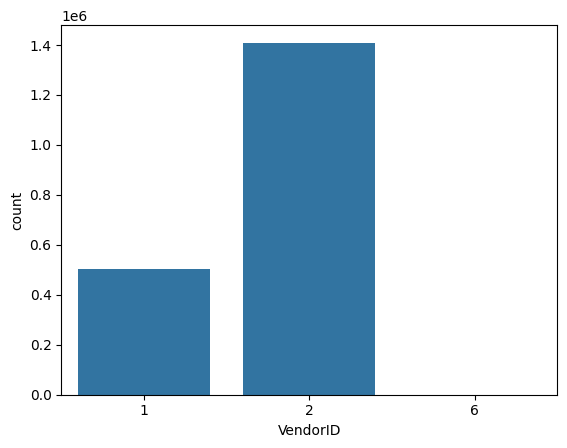

In [58]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# vendor_id
import pandas as pd       #data processing
import numpy as np        #linear algebra
#data visualisation
import seaborn as sns     
import matplotlib.pyplot as plt
sns.countplot(x='VendorID',data=final_df)
# number of trips by VendorId 2 are almost 3 times of VendorId 1



<Axes: xlabel='passenger_count', ylabel='count'>

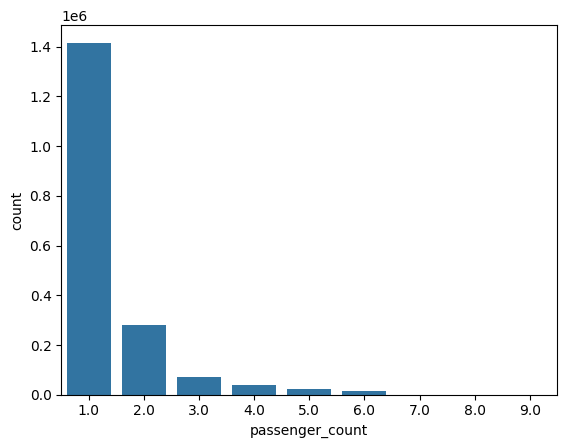

In [59]:
#passenger_count
final_df.passenger_count.value_counts()

# there are 4 rows with passenger count 7 and 2 rows with passenger count 9, both these rows can be removed
sns.countplot(x='passenger_count',data=final_df)

In [60]:
#trip distance 
final_df['trip_distance'].value_counts()
#majority of the trips are for shorter distances at max for 1.2 miles , rest of the records can be removed

trip_distance
0.00        38645
0.90        25740
1.00        25699
1.10        25303
0.80        25125
            ...  
30.51           1
54.70           1
19041.87        1
40.04           1
39.72           1
Name: count, Length: 4213, dtype: int64

In [61]:
#payment_type
final_df['payment_type'].value_counts()

filtered_df = final_df[final_df['payment_type'] == 0]
print(filtered_df)


           index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
12            12         2  2023-01-01 00:37:00   2023-01-01 00:58:00   
26            26         2  2023-01-01 00:32:00   2023-01-01 01:05:00   
31            31         2  2023-01-01 00:00:00   2023-01-01 00:08:00   
52            52         2  2023-01-01 00:50:00   2023-01-01 01:15:00   
63            63         2  2023-01-01 00:44:03   2023-01-01 01:13:49   
...          ...       ...                  ...                   ...   
1911212  1911212         1  2023-12-31 23:14:57   2023-12-31 23:31:17   
1911213  1911213         1  2023-12-31 23:27:01   2023-12-31 23:39:56   
1911215  1911215         1  2023-12-31 23:38:44   2023-12-31 23:55:14   
1911231  1911231         2  2023-12-31 23:36:29   2023-12-31 23:42:26   
1911232  1911232         2  2023-12-31 23:23:07   2023-12-31 23:31:40   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
12                   NaN           4.12         N

In [62]:
# there are no records with payment_type as 0

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

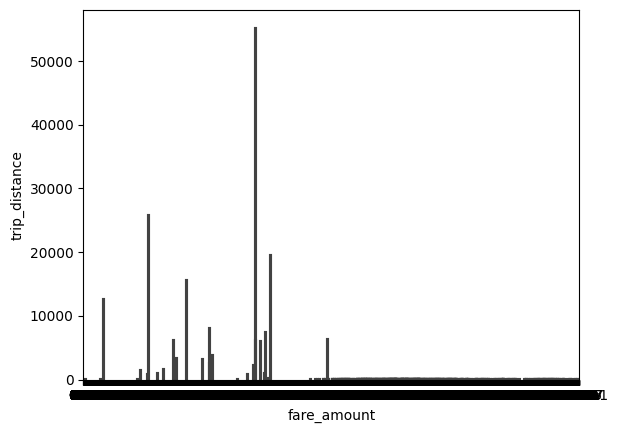

In [63]:
# trip_distance & fare_amount
sns.barplot(y='trip_distance',x='fare_amount',data=final_df,estimator=np.mean)

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [67]:
# remove passenger_count > 6
final_df=final_df[final_df['passenger_count'] <= 6]
final_df.passenger_count.value_counts()


passenger_count
1.0    1416356
2.0     279821
3.0      69828
4.0      39491
5.0      24035
6.0      16003
Name: count, dtype: int64

In [68]:
# Do any columns need standardising?

#the amount columns and actually numerical data columns can be standardized by using mean() and std() 

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [70]:
final_df.columns.tolist()

['index',
 'VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour',
 'Airport_fee',
 'pickup_day',
 'dropoff_day',
 'pickup_day_no',
 'dropoff_day_no',
 'pickup_hour',
 'dropoff_hour',
 'pickup_month',
 'dropoff_month',
 'pickup_timeofday',
 'dropoff_timeofday',
 'Merged_Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [73]:
#VendorID: - Categorical
#tpep_pickup_datetime: Here it is numerical but when we create additional columns it might become categorical
#tpep_dropoff_datetime: Here it is numerical but when we create additional columns it might become categorical
#passenger_count: Numerical
#trip_distance:   Numerical
#RatecodeID:      Categorical
#PULocationID:    Numerical 
#DOLocationID:    Numerical
#payment_type:    Categorical
#pickup_hour:     Categorical
#trip_duration :  here it is Numerical but if we divide the trip_duration in ranges as low/high it be Categorical

In [74]:
#The following monetary parameters belong in the same category, is it categorical or numerical?
#fare_amount
#extra
#mta_tax
#tip_amount
#tolls_amount
#improvement_surcharge
#total_amount
#congestion_surcharge
#airport_fee

#All the above are Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

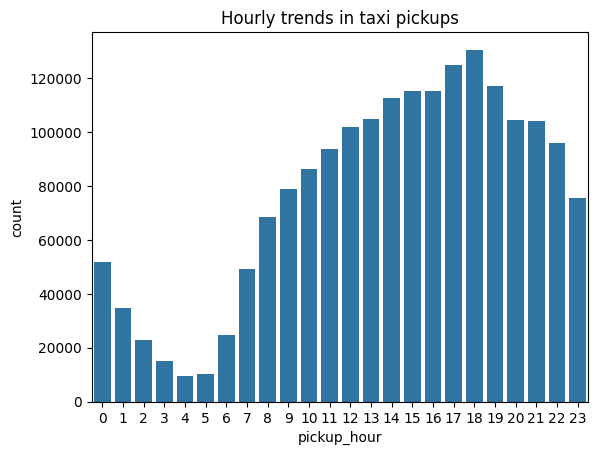

In [77]:
# Find and show the hourly trends in taxi pickups
fig, ax = plt.subplots()
ax.set_title('Hourly trends in taxi pickups')
ax=sns.countplot(x="pickup_hour",data=final_df,ax=ax)
#the plot shows that the maximum pickups are between 4 PM - 7 PM


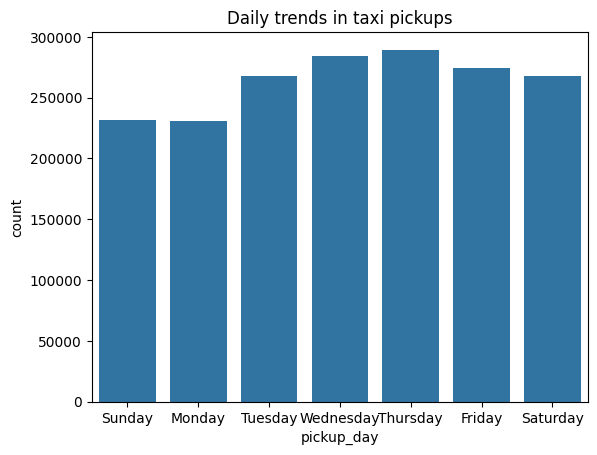

In [78]:
# Find and show the daily trends in taxi pickups (days of the week)
fig, ax1 = plt.subplots()
ax1.set_title('Daily trends in taxi pickups')
ax1=sns.countplot(x="pickup_day",data=final_df,ax=ax1)
# Thursdays is the busiest day followed by Wednesday & Friday




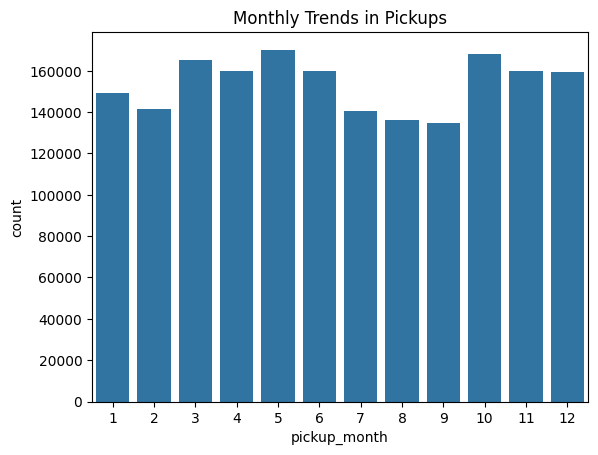

In [79]:
# Show the monthly trends in pickups
fig, ax2 = plt.subplots()
ax2.set_title('Monthly Trends in Pickups')
ax2=sns.countplot(x="pickup_month",data=final_df,ax=ax2)
#Maximum pickups are in the month of May & Oct


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [82]:
# Analyse the above parameters

inplist = ['fare_amount','tip_amount','total_amount','trip_distance']
results = {}
for col in inplist:
  if col in final_df.columns:
      results[col] = (final_df[col] <= 0).any()
  else:
      results[col]

print(results)



{'fare_amount': True, 'tip_amount': True, 'total_amount': True, 'trip_distance': True}


In [83]:
#The columns have zero/negative values 

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [86]:
# Create a df with non zero entries for the selected parameters.

inplist = ['fare_amount','tip_amount','total_amount','trip_distance']

# Create a new DataFrame with non-zero entries for selected columns
new_df = final_df[final_df[inplist].ne(0).all(axis=1)]


inplist = ['fare_amount','tip_amount','total_amount','trip_distance']
results = {}
for col in inplist:
  if col in new_df.columns:
      results[col] = (new_df[col] <= 0).any()
  else:
      results[col]

print(results)


{'fare_amount': False, 'tip_amount': False, 'total_amount': False, 'trip_distance': False}


In [87]:
#The new DF does not have any zero/negative amounts
new_df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday',
       'Merged_Airport_fee'],
      dtype='object')

In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1410613 entries, 0 to 1911240
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   index                  1410613 non-null  int64         
 1   VendorID               1410613 non-null  int64         
 2   tpep_pickup_datetime   1410613 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  1410613 non-null  datetime64[ns]
 4   passenger_count        1410613 non-null  float64       
 5   trip_distance          1410613 non-null  float64       
 6   RatecodeID             1410613 non-null  float64       
 7   store_and_fwd_flag     1410613 non-null  object        
 8   PULocationID           1410613 non-null  int64         
 9   DOLocationID           1410613 non-null  int64         
 10  payment_type           1410613 non-null  int64         
 11  fare_amount            1410613 non-null  float64       
 12  extra                  1410613 no

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [90]:
new_df.tail(80)

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
1911103  1911103         1  2023-12-31 23:34:58   2023-12-31 23:53:01   
1911105  1911105         1  2023-12-31 23:45:47   2023-12-31 23:49:42   
1911106  1911106         1  2023-12-31 23:41:58   2023-12-31 23:45:57   
1911112  1911112         2  2023-12-31 23:50:59   2023-12-31 23:57:09   
1911113  1911113         2  2023-12-31 23:23:30   2023-12-31 23:32:45   
...          ...       ...                  ...                   ...   
1911233  1911233         2  2023-12-31 23:14:49   2023-12-31 23:16:57   
1911235  1911235         2  2023-12-31 23:48:12   2024-01-01 00:13:55   
1911236  1911236         2  2023-12-31 23:15:17   2023-12-31 23:30:54   
1911239  1911239         1  2023-12-31 23:29:58   2023-12-31 23:46:57   
1911240  1911240         1  2023-12-31 23:15:50   2023-12-31 23:26:23   

         passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
1911103              1.0           3.80         1.0                  N   
1911105              4.0           0.80         1.0                  N   
1911106              2.0           0.50         1.0                  N   
1911112              1.0           0.31         1.0                  N   
1911113              1.0           3.41         1.0                  N   
...                  ...            ...         ...                ...   
1911233              1.0           0.51         1.0                  N   
1911235              4.0          18.82         1.0                  N   
1911236              2.0           1.05         1.0                  N   
1911239              1.0           2.50         1.0                  N   
1911240              1.0           4.40         1.0                  N   

         PULocationID  DOLocationID  payment_type  fare_amount  extra  \
1911103           161             7             1         19.8    3.5   
1911105           231            88             1          6.5    3.5   
1911106           141           141             1          5.8    3.5   
1911112           161           161             1          7.2    1.0   
1911113           137           263             1         14.9    1.0   
...               ...           ...           ...          ...    ...   
1911233           141           263             1          5.1    1.0   
1911235           132           262             1         69.5    1.0   
1911236           161           164             1         14.2    1.0   
1911239            90           148             1         17.0    3.5   
1911240           265           265             1         19.8    1.0   

         mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
1911103      0.5        4.95          0.00                    1.0   
1911105      0.5        2.30          0.00                    1.0   
1911106      0.5        2.15          0.00                    1.0   
1911112      0.5        2.44          0.00                    1.0   
1911113      0.5       10.00          0.00                    1.0   
...          ...         ...           ...                    ...   
1911233      0.5        2.52          0.00                    1.0   
1911235      0.5       12.48          6.94                    1.0   
1911236      0.5        3.84          0.00                    1.0   
1911239      0.5        4.40          0.00                    1.0   
1911240      0.5        4.45          0.00                    1.0   

         total_amount  congestion_surcharge  airport_fee        date  hour  \
1911103         29.75                   2.5          NaN  2023-12-31    23   
1911105         13.80                   2.5          NaN  2023-12-31    23   
1911106         12.95                   2.5          NaN  2023-12-31    23   
1911112         14.64                   2.5          NaN  2023-12-31    23   
1911113         29.90                   2.5          NaN  2023-12-31    23   
...               ...                   ...          ...         ...   

In [91]:
# Group data by month and analyse monthly revenue
#pickup_month
new_df['pickup_month'] = pd.to_datetime(new_df['pickup_month'],format='%m')
new_df['month_name'] = new_df['pickup_month'].dt.month_name()
#grouped_df = new_df.groupby(['month_name'])
#sum_col3 = grouped_df['total_amount'].sum()
#print(sum_col3)

grouped_df = new_df.groupby(['month_name'])['total_amount'].sum().reset_index()
#grouped_df = df.groupby(['Category', 'Subcategory'])['Values'].sum().reset_index()


print(grouped_df)


   month_name  total_amount
0       April    3581006.89
1      August    3002553.74
2    December    3624166.42
3    February    3075665.90
4     January    3200584.70
5        July    3117554.04
6        June    3690359.39
7       March    3690011.68
8         May    3926393.82
9    November    3747262.16
10    October    3952137.86
11  September    3203086.43


C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\508338617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['pickup_month'] = pd.to_datetime(new_df['pickup_month'],format='%m')
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\508338617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['month_name'] = new_df['pickup_month'].dt.month_name()


<Axes: xlabel='total_amount', ylabel='month_name'>

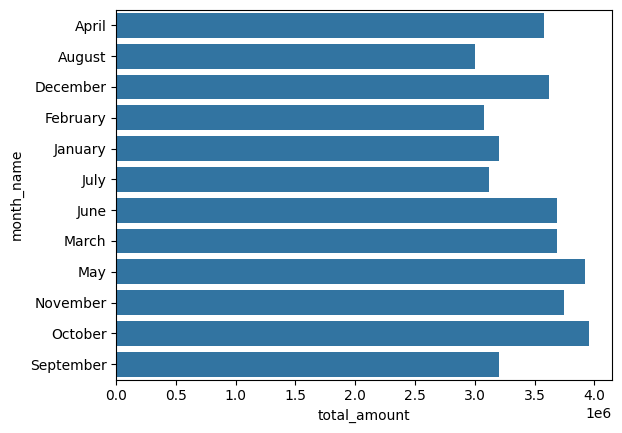

In [92]:
#fig, ax4 = plt.subplots()
#ax4.set_title('Monthly Revenue Analysis')
#ax4=sns.countplot(x="month_name",data=grouped_df,ax=ax4)
#Maximum pickups are in the month of May & Oct

sns.barplot(x='total_amount',y='month_name',data=grouped_df,estimator=np.mean)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [94]:
import pandas as pd
# Calculate proportion of each quarter
def month_to_quarter(df, month_col):
    month_to_qtr = {
        'January': 'Q1', 'February': 'Q1', 'March': 'Q1',
        'April': 'Q2', 'May': 'Q2', 'June': 'Q2',
        'July': 'Q3', 'August': 'Q3', 'September': 'Q3',
        'October': 'Q4', 'November': 'Q4', 'December': 'Q4'
    }
    df['quarter'] = df[month_col].map(month_to_qtr)
    return df

month_to_quarter(grouped_df,'month_name')
#print(grouped_pdf)
#grouped_df.head()

quarterly_sales = grouped_df.groupby('quarter')['total_amount'].sum().reset_index()
total_sales = quarterly_sales['total_amount'].sum()
grouped_df['sales_proportion'] = quarterly_sales['total_amount'] / total_sales
#del grouped_df['Quarter']
grouped_df.head()


month_name  total_amount quarter  sales_proportion
0      April    3581006.89      Q2          0.238366
1     August    3002553.74      Q3          0.267820
2   December    3624166.42      Q4          0.222985
3   February    3075665.90      Q1          0.270829
4    January    3200584.70      Q1               NaN

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

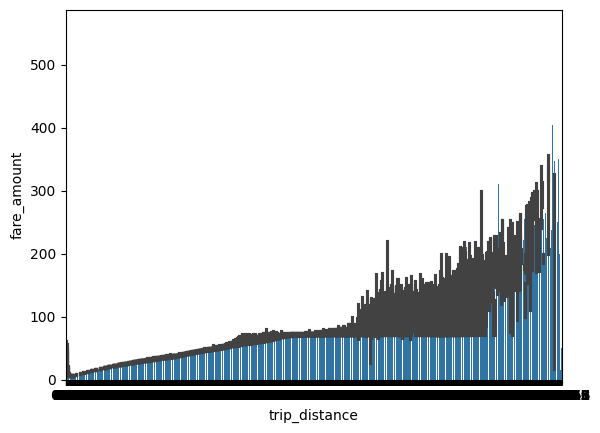

In [96]:
# Show how trip fare is affected by distance

sns.barplot(x='trip_distance',y='fare_amount',data=new_df,estimator=np.mean)
# trip fare increases as the distance increases



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [98]:
new_df.columns


Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday',
       'Merged_Airport_fee', 'month_name'],
      dtype='object')

C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1198736329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tpep_pickup_datetime'] = pd.to_datetime(new_df['tpep_pickup_datetime'])
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1198736329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tpep_dropoff_datetime'] = pd.to_datetime(new_df['tpep_dropoff_datetime'])
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1198736329.py:10: SettingWithCopyWarning: 
A value is trying to be set on a c

Correlation between fare amount and trip duration: 0.31503761280813103


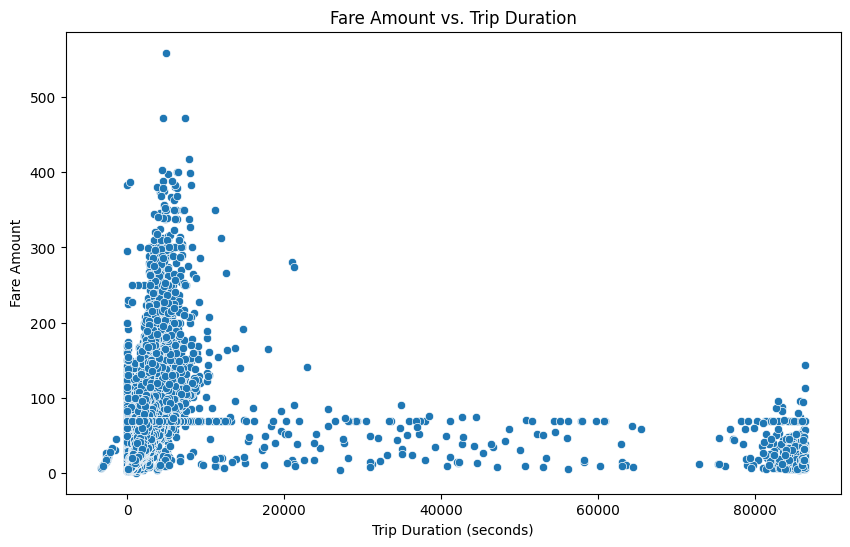

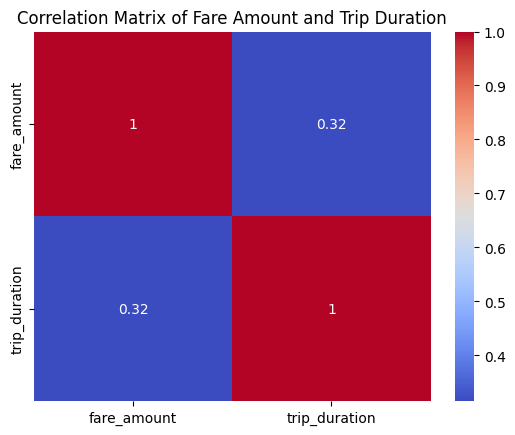

In [99]:
# Show relationship between fare and trip duration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Convert pickup and dropoff time to datetime objects
new_df['tpep_pickup_datetime'] = pd.to_datetime(new_df['tpep_pickup_datetime'])
new_df['tpep_dropoff_datetime'] = pd.to_datetime(new_df['tpep_dropoff_datetime'])

# Calculate trip duration in seconds
new_df['trip_duration'] = (new_df['tpep_dropoff_datetime'] - new_df['tpep_pickup_datetime']).dt.total_seconds()

# Calculate the correlation between fare amount and trip duration
correlation = new_df['fare_amount'].corr(new_df['trip_duration'])
print(f"Correlation between fare amount and trip duration: {correlation}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=new_df)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Fare Amount')
plt.show()

# Create a heatmap to show the correlation matrix
correlation_matrix = new_df[['fare_amount', 'trip_duration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Fare Amount and Trip Duration')
plt.show()


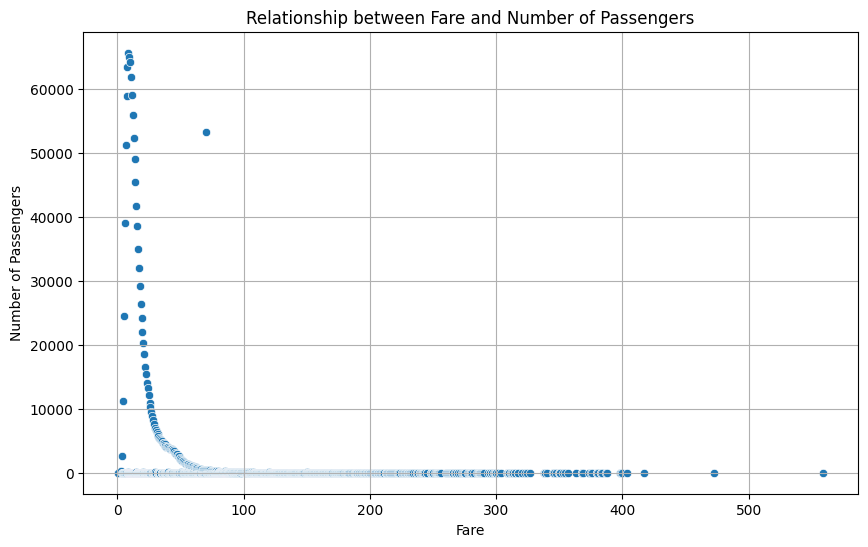

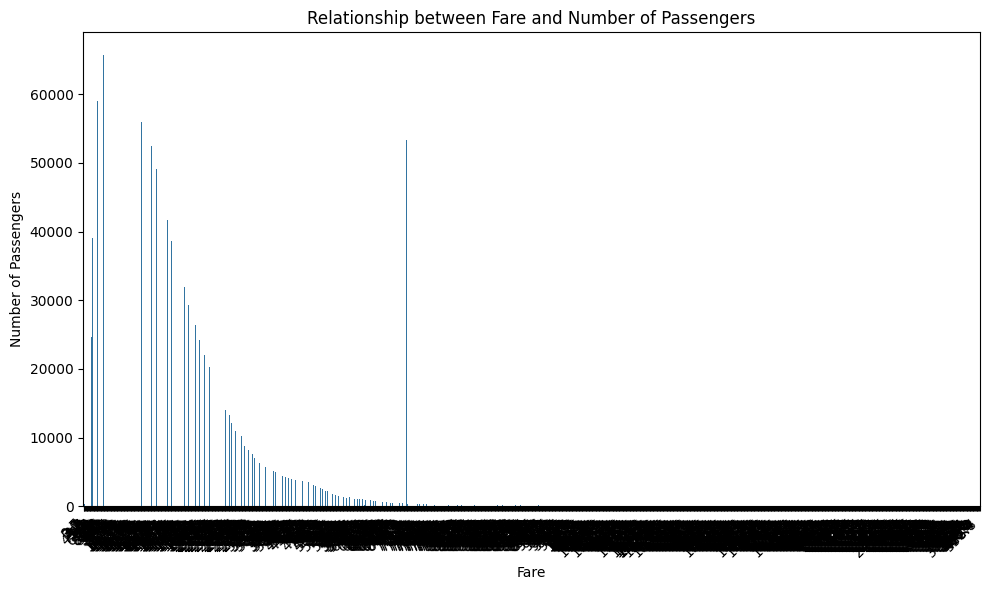

In [100]:
# Show relationship between fare and number of passengers
fare_passenger_counts = new_df.groupby('fare_amount')['passenger_count'].count().reset_index(name='passenger_count')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fare_amount', y='passenger_count', data=fare_passenger_counts)
plt.title('Relationship between Fare and Number of Passengers')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Optionally, create a bar plot for better visualization if there are many identical fares
plt.figure(figsize=(10, 6))
sns.barplot(x='fare_amount', y='passenger_count', data=fare_passenger_counts)
plt.title('Relationship between Fare and Number of Passengers')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



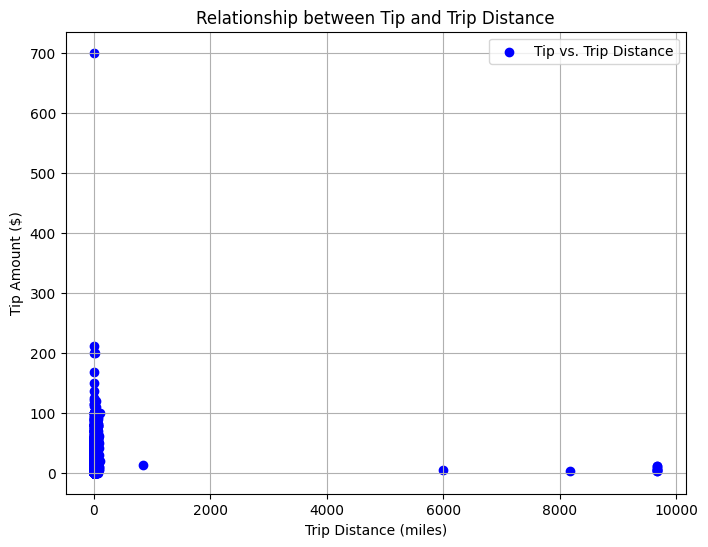

In [101]:
# Show relationship between tip and trip distance

# 1. Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(new_df['trip_distance'],new_df['tip_amount'], color='blue', marker='o', label='Tip vs. Trip Distance')
plt.title('Relationship between Tip and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.legend()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

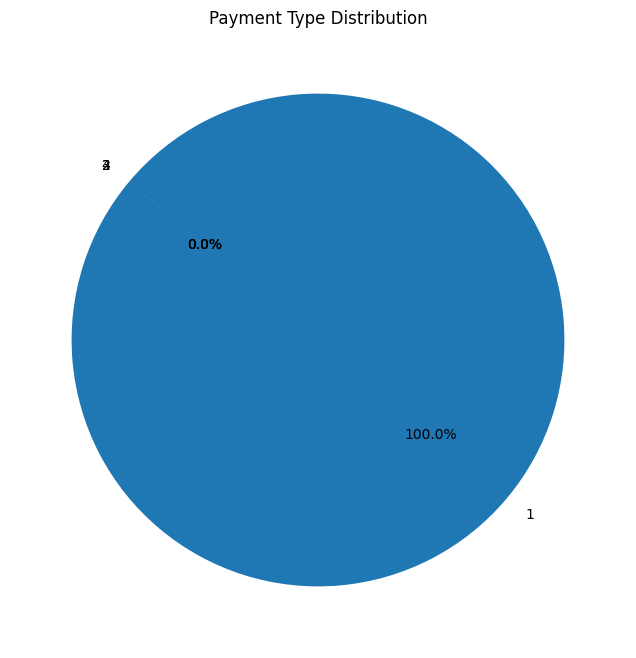

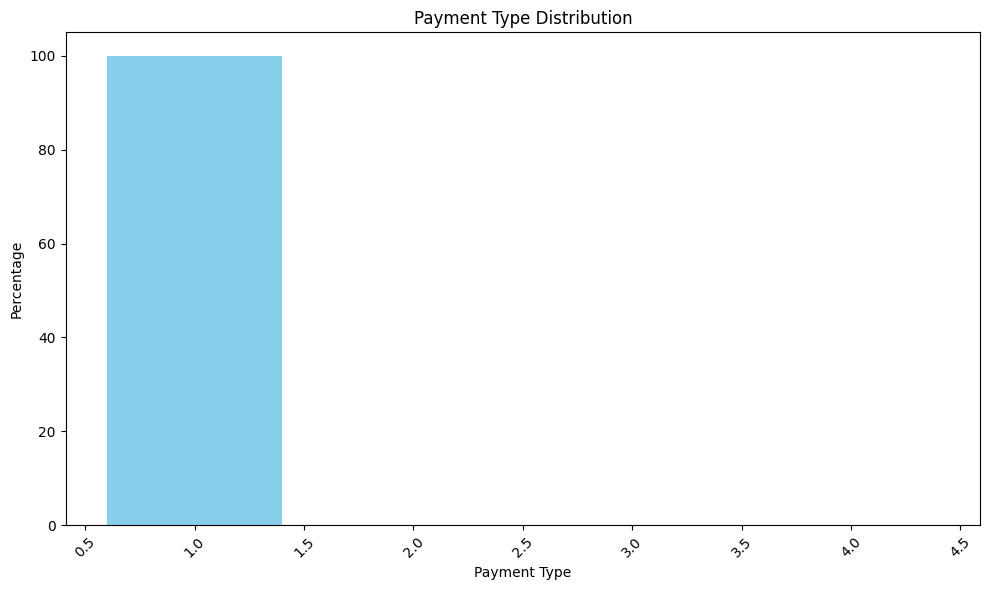

In [103]:
# Analyse the distribution of different payment types (payment_type).

new_df = new_df.groupby('payment_type')['total_amount'].sum().reset_index()

# Calculate the percentage distribution
total_amount = new_df['total_amount'].sum()
new_df['percentage'] = (new_df['total_amount'] / total_amount) * 100
new_df = new_df.sort_values(by='percentage', ascending=False).reset_index(drop=True)

# Create a pie chart or bar chart
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(new_df['percentage'], labels=new_df['payment_type'], autopct='%1.1f%%', startangle=140)
plt.title('Payment Type Distribution')
plt.show()

# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(new_df['payment_type'], new_df['percentage'], color='skyblue')
plt.xlabel('Payment Type')
plt.ylabel('Percentage')
plt.title('Payment Type Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [108]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [110]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

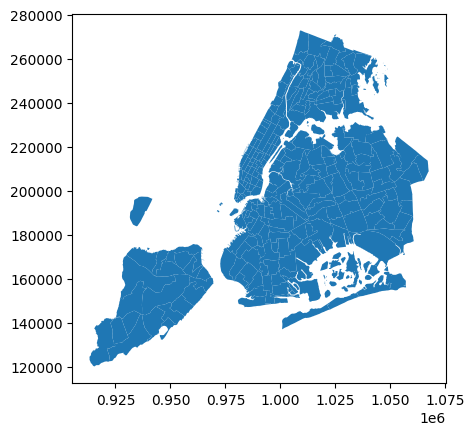

In [112]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [115]:
import pandas as pd

In [116]:
# Merge zones and trip records using locationID and PULocationID
nmerged_df = pd.merge(final_df,zones, left_on='PULocationID', right_on='LocationID')
#nmerged_df.head(2)




**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [118]:
# Group data by location and calculate the number of trips
trip_counts = nmerged_df['LocationID'].value_counts()
print(trip_counts)

LocationID
132    99208
237    87662
161    86590
236    77204
162    66225
       ...  
172        1
156        1
109        1
111        1
251        1
Name: count, Length: 251, dtype: int64


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [120]:
# Merge trip counts back to the zones GeoDataFrame

#1.create a dataframe for trip counts by LocationID

def create_df_trips_by_location(df, location_column):
    
    trips_by_location = df.groupby('LocationID').size().reset_index(name='Number of Trips')
    return trips_by_location
trip_counts_df = create_df_trips_by_location(nmerged_df,'LocationID') 
#trip_counts_df.head(2)

tripcounts_zones_merged_df = pd.merge(zones, trip_counts_df, on='LocationID', how='left')
tripcounts_zones_merged_df.head()
    


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   Number of Trips  
0            257.0  
1              1.0  
2             41.0  
3           1809.0  
4             14.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

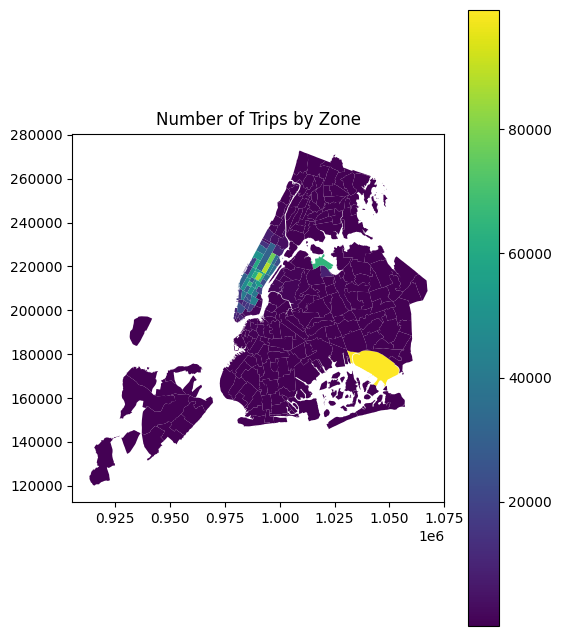

In [124]:
# Define figure and axis
import geopandas as gpd
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6,8))

# Plot the map and display it
tripcounts_zones_merged_df.plot(column="Number of Trips", cmap="viridis", legend=True, ax=ax)

ax.set_title("Number of Trips by Zone")
plt.show()


In [125]:
# can you try displaying the zones DF sorted by the number of trips?
tripcounts_zones_merged_df_sorted = tripcounts_zones_merged_df.sort_values(by='Number of Trips')
tripcounts_zones_merged_df_sorted.head(50).tail(15)



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
43         44    0.235689    0.001945   Charleston/Tottenville          44   
170       171    0.107354    0.000520       Murray Hill-Queens         171   
174       175    0.134898    0.000505          Oakland Gardens         175   
5           6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
251       252    0.158004    0.001025               Whitestone         252   
53         54    0.076219    0.000132          Columbia Street          54   
52         53    0.161501    0.000948            College Point          53   
189       190    0.074329    0.000271            Prospect Park         190   
200       201    0.130404    0.000619            Rockaway Park         201   
97         98    0.121661    0.000486            Fresh Meadows          98   
101       102    0.136900    0.000297                 Glendale         102   
191       192    0.111965    0.000374          Queensboro Hill         192   
22         23    0.290556    0.002196  Bloomfield/Emerson Hill          23   
10         11    0.079211    0.000265               Bath Beach          11   
15         16    0.141292    0.000872                  Bayside          16   

           borough                                           geometry  \
43   Staten Island  POLYGON ((925284.273 142075.259, 924921.951 14...   
170         Queens  POLYGON ((1041536.76 220023.061, 1041527.85 21...   
174         Queens  POLYGON ((1051776.198 215687.328, 1051892.956 ...   
5    Staten Island  POLYGON ((966568.747 158679.855, 966615.256 15...   
251         Queens  POLYGON ((1033946.683 231157.996, 1033973.166 ...   
53        Brooklyn  MULTIPOLYGON (((983766.472 191538.898, 983138....   
52          Queens  MULTIPOLYGON (((1028995.215 230162.246, 102877...   
189       Brooklyn  POLYGON ((994493.788 180510.434, 994567.804 17...   
200         Queens  POLYGON ((1034661.735 153320.591, 1034718.155 ...   
97          Queens  POLYGON ((1049758.207 208666.299, 1050016.609 ...   
101         Queens  POLYGON ((1024186.946 196680.736, 1024191.248 ...   
191         Queens  POLYGON ((1033459.319 212522.305, 1033758.551 ...   
22   Staten Island  POLYGON ((929937.155 170690.809, 929967.456 17...   
10        Brooklyn  POLYGON ((983945.076 158978.174, 984160.158 15...   
15          Queens  POLYGON ((1048344.039 223210.621, 1048409.575 ...   

     Number of Trips  
43              24.0  
170             26.0  
174             26.0  
5               26.0  
251             26.0  
53              27.0  
52              30.0  
189             30.0  
200             32.0  
97              32.0  
101             33.0  
191             34.0  
22              34.0  
10              34.0  
15              34.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [134]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [137]:
# Visualise the number of trips per hour and find the busiest hour
#merged_inner_df = pd.merge(nmerged_df,tripcounts_zones_merged_df, on='LocationID')
nmerged_df.columns
nmerged_df['pickup_datetime'] = pd.to_datetime(nmerged_df['tpep_pickup_datetime'])
nmerged_df['pickup_hour'] = nmerged_df['pickup_datetime'].dt.hour
hourly_counts = nmerged_df['pickup_hour'].value_counts().sort_index()

busiest_hour = hourly_counts.idxmax()
print(f"The busiest hour is: {busiest_hour}:00 - {busiest_hour + 1}:00")
    


The busiest hour is: 18:00 - 19:00


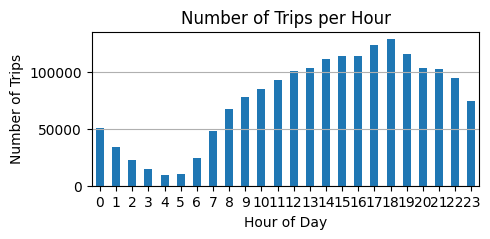

In [138]:
plt.figure(figsize=(5, 2))
hourly_counts.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [141]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
#sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

<Figure size 400x200 with 0 Axes>

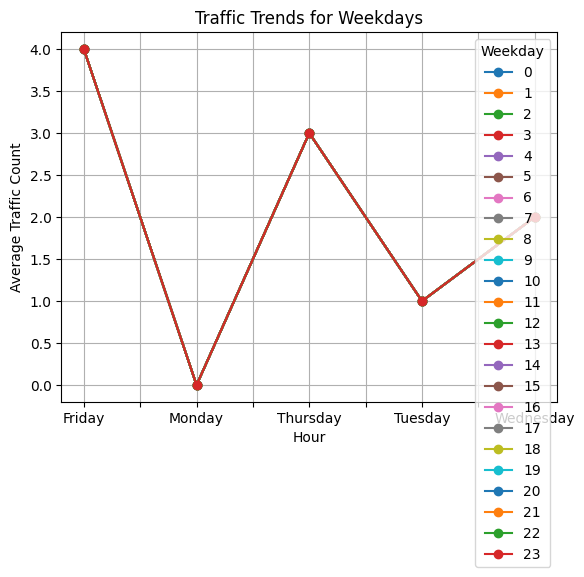

In [143]:
# Compare traffic trends for the week days and weekends
nmerged_df.head(1)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_df = nmerged_df[nmerged_df['pickup_day'].isin(weekdays)]
grouped = weekday_df.groupby(['pickup_day', 'hour'])['pickup_day_no'].mean().unstack()

plt.figure(figsize=(4, 2))
grouped.plot(kind='line', marker='o')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Count')
plt.title('Traffic Trends for Weekdays')
plt.legend(title='Weekday')
plt.grid(True)
plt.show()


<Figure size 200x200 with 0 Axes>

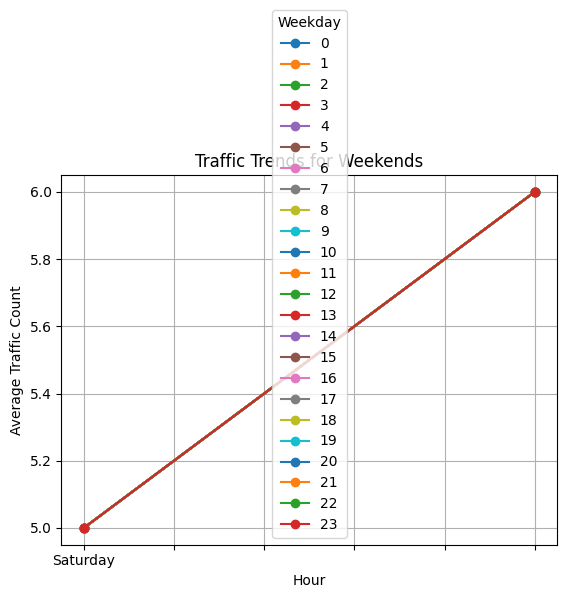

In [144]:
weekend = ['Saturday', 'Sunday']
weekend_df = nmerged_df[nmerged_df['pickup_day'].isin(weekend)]
grouped = weekend_df.groupby(['pickup_day', 'hour'])['pickup_day_no'].mean().unstack()

plt.figure(figsize=(2, 2))
grouped.plot(kind='line', marker='o')
plt.xlabel('Hour')
plt.ylabel('Average Traffic Count')
plt.title('Traffic Trends for Weekends')
plt.legend(title='Weekday')
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [147]:
nmerged_df.head(3)

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0      0         2  2023-01-01 00:30:23   2023-01-01 00:34:11   
1      1         2  2023-01-01 00:13:33   2023-01-01 00:38:08   
2      2         2  2023-01-01 00:48:17   2023-01-01 00:58:54   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              1.0           0.81         1.0                  N   
1              2.0          11.91         1.0                  N   
2              1.0           1.12         1.0                  N   

   PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  \
0           236           141             1          5.8    1.0      0.5   
1           132             9             4          0.0    0.0      0.0   
2           249           231             1         11.4    1.0      0.5   

   tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0        2.16           0.0                    1.0         12.96   
1        0.00           0.0                    0.0          0.00   
2        1.64           0.0                    1.0         18.04   

   congestion_surcharge  airport_fee        date  hour  Airport_fee  \
0                   2.5          0.0  2023-01-01     0          NaN   
1                   0.0          0.0  2023-01-01     0          NaN   
2                   2.5          0.0  2023-01-01     0          NaN   

  pickup_day dropoff_day  pickup_day_no  dropoff_day_no  pickup_hour  \
0     Sunday      Sunday              6               6            0   
1     Sunday      Sunday              6               6            0   
2     Sunday      Sunday              6               6            0   

   dropoff_hour  pickup_month  dropoff_month pickup_timeofday  \
0             0             1              1       Late night   
1             0             1              1       Late night   
2             0             1              1       Late night   

  dropoff_timeofday Merged_Airport_fee  OBJECTID  Shape_Leng  Shape_Area  \
0        Late night             nan0.0       236    0.044252    0.000103   
1        Late night           nan-1.25       132    0.245479    0.002038   
2        Late night             nan0.0       249    0.036384    0.000072   

                    zone  LocationID    borough  \
0  Upper East Side North         236  Manhattan   
1            JFK Airport         132     Queens   
2           West Village         249  Manhattan   

                                            geometry     pickup_datetime  
0  POLYGON ((995940.048 221122.92, 995812.322 220... 2023-01-01 00:30:23  
1  MULTIPOLYGON (((1032791.001 181085.006, 103283... 2023-01-01 00:13:33  
2  POLYGON ((983555.319 204876.901, 983469.158 20... 2023-01-01 00:48:17

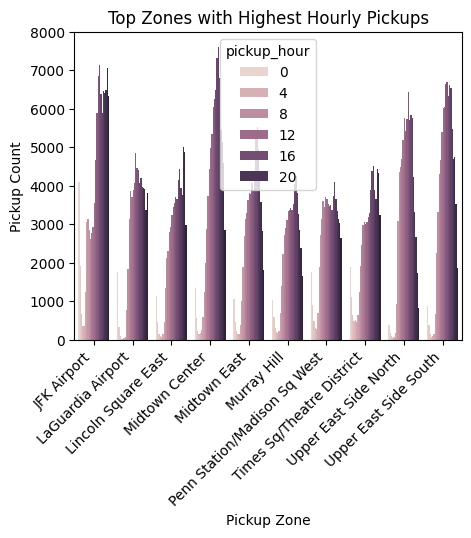

In [148]:
# Find top 10 pickup and dropoff zones

pickup_counts = nmerged_df.groupby(['pickup_hour', 'zone']).size().reset_index(name='pickup_count')
zone_totals = pickup_counts.groupby('zone')['pickup_count'].sum().reset_index()
top_zones = zone_totals.nlargest(10, 'pickup_count')
top_hourly_pickups = pd.merge(pickup_counts, top_zones['zone'], on='zone')
plt.figure(figsize=(5,4))
sns.barplot(x='zone', y='pickup_count', data=top_hourly_pickups,hue='pickup_hour')
plt.title('Top Zones with Highest Hourly Pickups')
plt.xlabel('Pickup Zone')
plt.ylabel('Pickup Count')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()



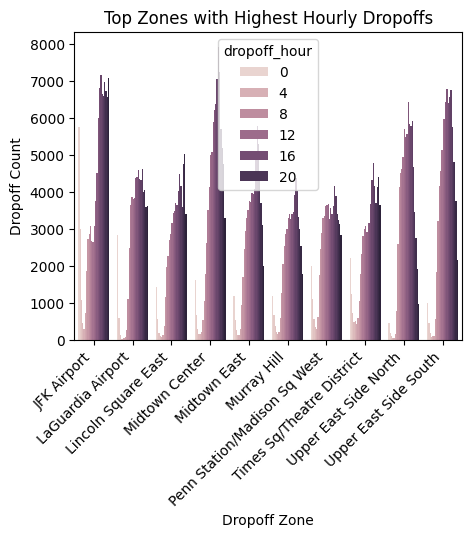

In [149]:
# Find top 10 dropoff zones
dropoff_counts = nmerged_df.groupby(['dropoff_hour', 'zone']).size().reset_index(name='dropoff_count')
zone_totals = dropoff_counts.groupby('zone')['dropoff_count'].sum().reset_index()
top_zones = zone_totals.nlargest(10, 'dropoff_count')
top_hourly_dropoffs = pd.merge(dropoff_counts, top_zones['zone'], on='zone')
plt.figure(figsize=(5,4))
sns.barplot(x='zone', y='dropoff_count', data=top_hourly_dropoffs,hue='dropoff_hour')
plt.title('Top Zones with Highest Hourly Dropoffs')
plt.xlabel('Dropoff Zone')
plt.ylabel('Dropoff Count')
plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [151]:

# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [153]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [155]:
#nmerged_df.head(2)

In [156]:
# Filter for night hours (11 PM to 5 AM)
#pickup_hour
start_night = 23
end_night = 5
#df[time_column] = pd.to_datetime(df[time_column]).dt.hour # Extract hour from time column
total_revenue = nmerged_df['total_amount'].sum()
    
# Filter for nighttime hours based on defined start and end
night_revenue_df = nmerged_df[((nmerged_df['pickup_hour'] >= start_night) | (nmerged_df['pickup_hour'] < end_night)) ] # Handle wraparound (e.g., 10pm to 6am)
night_revenue = night_revenue_df['total_amount'].sum()
    
night_revenue_share = (night_revenue / total_revenue) * 100
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")   


Nighttime Revenue Share: 11.29%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [159]:
has_zeros = (nmerged_df['trip_distance'] == 0).any()
print(f"Column '{column_name}' has zeros: {has_zeros}")
nmerged_clean_df = nmerged_df[~nmerged_df['trip_distance'].isin([0,np.nan])]
                        

Column 'passenger_count' has zeros: True


C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\163358980.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmerged_clean_df['fare_per_mile'] = nmerged_clean_df['fare_amount'] / nmerged_clean_df['trip_distance']
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\163358980.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmerged_clean_df['fare_per_mile_per_passenger'] = nmerged_clean_df['fare_per_mile'] / nmerged_clean_df['passenger_count']


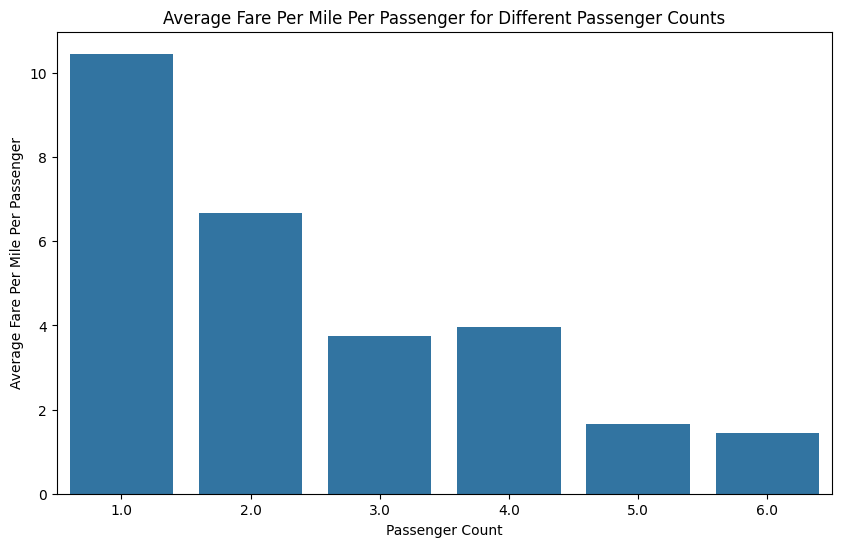

In [160]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile
#passenger_count
#trip_distance
#fare_amount
nmerged_clean_df['fare_per_mile'] = nmerged_clean_df['fare_amount'] / nmerged_clean_df['trip_distance']
nmerged_clean_df['fare_per_mile_per_passenger'] = nmerged_clean_df['fare_per_mile'] / nmerged_clean_df['passenger_count']
#print(nmerged_df['fare_per_mile_per_passenger'])
grouped_data = nmerged_clean_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

#print(grouped_data)

mynew_df = grouped_data.to_frame(name='fare_per_mile_per_passenger')
mynew_df = mynew_df.reset_index()

#print(mynew_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=mynew_df)
plt.title('Average Fare Per Mile Per Passenger for Different Passenger Counts')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare Per Mile Per Passenger')
plt.show()    



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1335265236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmerged_clean_df['hour'] = nmerged_clean_df['tpep_pickup_datetime'].dt.hour
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1335265236.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nmerged_clean_df['day_of_week'] = nmerged_clean_df['tpep_pickup_datetime'].dt.day_name()
C:\Users\itstu\AppData\Local\Temp\ipykernel_9264\1335265236.py:18: SettingWithCopyWarning: 
A value is trying to be set o

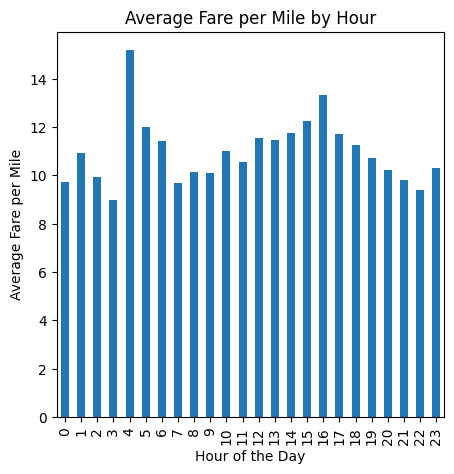

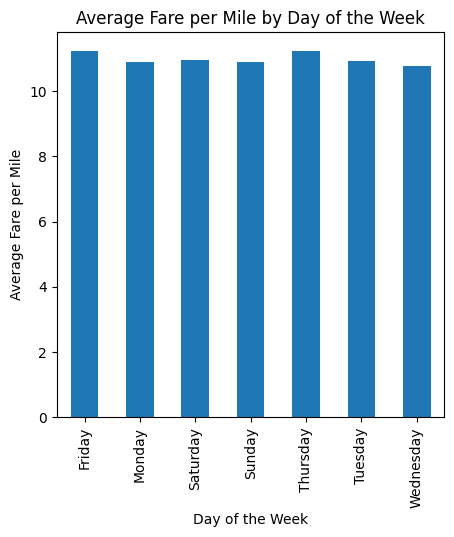

In [162]:
# Compare the average fare per mile for different days and for different times of the day
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
#data = {
#    'datetime': pd.to_datetime(['2025-01-01 08:00:00', '2025-01-01 10:00:00', '2025-01-01 12:00:00', '2025-01-02 10:00:00', '2025-01-03 12:00:00']),
#    'fare': [3.5, 5.2, 7.8, 4.5, 6.1],
#    'distance': [1.5, 2.0, 2.5, 1.8, 3.0]
#}
#df = pd.DataFrame(data)

# Add hour and day of the week columns
nmerged_clean_df['hour'] = nmerged_clean_df['tpep_pickup_datetime'].dt.hour
nmerged_clean_df['day_of_week'] = nmerged_clean_df['tpep_pickup_datetime'].dt.day_name()

# Calculate fare per mile
nmerged_clean_df['fare_per_mile'] = nmerged_clean_df['fare_amount'] / nmerged_clean_df['trip_distance']

# Average fare per mile by hour
hourly_avg = nmerged_clean_df.groupby('hour')['fare_per_mile'].mean()

# Average fare per mile by day of the week
weekly_avg = nmerged_clean_df.groupby('day_of_week')['fare_per_mile'].mean()
sorted_weekly_avg = weekly_avg.sort_values(ascending=False)
#weekly_avg = nmerged_clean_df.groupby('day_of_week', group_keys=False).apply(lambda x: x.sort_values(by=nmerged_clean_df['fare_per_mile'])).mean()

# Visualization (example using matplotlib)
# Hourly
plt.figure(figsize=(5, 5))
hourly_avg.plot(kind='bar', title='Average Fare per Mile by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile')
plt.show()

# Weekly
plt.figure(figsize=(5, 5))
sorted_weekly_avg.sort_index(inplace=True) # Sort by day of the week for better visualization
weekly_avg.plot(kind='bar', title='Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

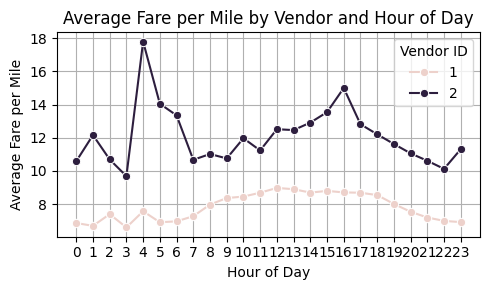

In [164]:
# Compare fare per mile for different vendors

avg_fare_per_mile = nmerged_clean_df.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Create the visualization
plt.figure(figsize=(5, 3))
sns.lineplot(data=avg_fare_per_mile, x='pickup_hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Vendor and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile')
plt.xticks(range(24))
plt.legend(title='Vendor ID')
plt.grid(True)
plt.tight_layout()
plt.show()
#1. For vendor 1 Avg Fare  Per Mile are comparatively less as compared tp Vendor 2
#2. For Vendor 1,the spike in avg fare per miile occurs between 12 PM to 2 PM
#3. For Venfor 2, spikes in avg fare are significant , max is during early morning hours 4 A M and then the next spike is at 4 P M 



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [166]:
nmerged_clean_df.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour',
       'Airport_fee', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday',
       'Merged_Airport_fee', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry', 'pickup_datetime', 'fare_per_mile',
       'fare_per_mile_per_passenger', 'day_of_week'],
      dtype='object')

In [167]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
#nmerged_clean_df['tpep_pickup_datetime'] = pd.to_datetime(nmerged_clean_df['tpep_pickup_datetime'])

# Calculate average tip for each group
df_grouped = nmerged_clean_df.groupby(['trip_distance', 'passenger_count', 'tpep_pickup_datetime'])['tip_amount'].mean().reset_index()

# Calculate overall average tip
overall_avg_tip = nmerged_clean_df['tip_amount'].mean()

# Calculate tip percentages relative to the overall average
df_grouped['tip_percentage'] = (df_grouped['tip_amount'] / overall_avg_tip) * 100



#print('Hi')
#plt.figure(figsize=(10, 5))

# Tip percentage vs. distance
#plt.subplot(1, 1, 1)
#sns.barplot(x='trip_distance', y='tip_percentage', data=df_grouped)
#plt.title('Tip Percentage vs. Distance')

#fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1. Scatter plot: Trip Distance vs. Tip Percentage
#sns.scatterplot(x='trip_distance', y='tip_percentage', data=df_grouped, ax=axes[0], alpha=0.5)
#axes[0].set_title('Tip Percentage vs. Trip Distance')
#axes[0].set_xlabel('Trip Distance (miles)')
#axes[0].set_ylabel('Tip Percentage (%)')

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Create the bar plot
#plt.figure(figsize=(8, 6))  # Adjust figure size as needed
#plt.bar(categories, values, color='skyblue')

# Bar plot for trip distance
sns.barplot(x='trip_distance', y='tip_percentage', data=df_grouped, ax=axes[0])
axes[0].set_title('Average Tip Percentage by Trip Distance')
axes[0].set_ylabel('Percentage of Average Tip')

# Bar plot for passenger count
sns.barplot(x='passenger_count', y='tip_percentage', data=df_grouped, ax=axes[1])
axes[1].set_title('Average Tip Percentage by Passenger Count')
axes[1].set_ylabel('Percentage of Average Tip')

#Bar plot for pickup time
sns.barplot(x='tpep_pickup_datetime', y='tip_percentage', data=df_grouped, ax=axes[2])
axes[2].set_title('Average Tip Percentage by Pickup Time')
axes[2].set_ylabel('Percentage of Average Tip')
axes[2].tick_params(axis='x', rotation=45)

#plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
nmerged_clean_df.columns
# 1. Group by hour and get average passenger count
hourly_avg = nmerged_clean_df.groupby("hour")['passenger_count'].mean()

# 2. Group by day of week and get average passenger count
daily_avg = nmerged_clean_df.groupby("day_of_week")['passenger_count'].mean()

# 3. Visualize Hourly Variation
plt.figure(figsize=(5, 3))
hourly_avg.plot(kind="line", marker="o")
plt.title("Average Passenger Count by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Passenger Count")
plt.xticks(range(24))  # Set x-ticks for each hour
plt.grid(True)
plt.show()

# 4. Visualize Daily Variation
plt.figure(figsize=(8, 5))
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
#daily_avg.index = days
daily_avg.plot(kind="bar")
plt.title("Average Passenger Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Passenger Count")
plt.grid(axis="y")
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
nmerged_clean_df.columns

In [ ]:
# How does passenger count vary across zones
zone_passenger_avg = nmerged_clean_df.groupby('zone')['passenger_count'].mean().reset_index()
# Create a bar chart
plt.figure(figsize=(10,10))  # Adjust figure size as needed
plt.bar(zone_passenger_avg['zone'], zone_passenger_avg['passenger_count'], color='skyblue')
plt.xlabel("Pickup Zone")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Zones")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
#plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

    

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

nmerged_clean_df.tail(2)

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# Group by pickup hour and count the number of trips with extra charges
pickup_extra_charges = nmerged_clean_df[nmerged_clean_df['extra'] == True].groupby('pickup_hour').size().sort_values(ascending=False)

# Group by dropoff hour and count the number of trips with extra charges
dropoff_extra_charges = nmerged_clean_df[nmerged_clean_df['extra'] == True].groupby('dropoff_hour').size().sort_values(ascending=False)

# Print the results
#print("Top Pickup Hours with Extra Charges:\n", pickup_extra_charges)
#print("\nTop Dropoff Hours with Extra Charges:\n", dropoff_extra_charges)

# Visualize the results (optional)
plt.figure(figsize=(10, 5))

# Plot pickup hour extra charges
plt.subplot(1, 2, 1)
pickup_extra_charges.plot(kind='bar')
plt.title('Pickup Time with Extra Charges')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')

# Plot dropoff hour extra charges
plt.subplot(1, 2, 2)
dropoff_extra_charges.plot(kind='bar')
plt.title('Dropoff Time with Extra Charges')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')

plt.tight_layout()
plt.show()
#1. for Pickups . extra charges are levied from 7 PM untii 6 AM 
#2. For pickups, maximum extra charges are leview at 9 PM
#3. for dropoffs , pattern is almost the same , however the customer os charged more at 12 AM and 1 AM as compared to pickups

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
As per the observation, the demand is maximum during evening from 5 PM to 7 PM and then between 11 PM to 5 AM for pickups and drop offs , majority of thee trips are of 
short distance (less than 2 miles) and the fares are maximum for short trips , also the pricing is more if the passenger count is 1 or 4 , in order to operate 
with maximum efficiency , either the concept of shared ride can be introduced which can be cost effective for the customer at the same time the 
organization can have maximum utilization of its taxis , this can be a win-win situation for the customers as well as the serving organization at least 
        during peak hours
                

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
There are only 3 zones which have maximum trip density during odd hours for pickup and dropoff, the organization can have an incentive based plan for 
the drivers if they can operate out of their zones during peak hours.For weekdays efforts must be made to look at the reasons for low business during 
the beginning of the week . For a year there are only 2 months when the business is at its best, it needs to be investigated as to why for the rest of
the mmonths in the year that the business is not able to pick up




**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Based on the analysis , the understanding is that more vendors need to be brought in to service the customers , we observed that out of the two 
vendors,only one vendor has been dominating the market, with more players the organization can service more customers eventually leading to the business
expnasion & growth. There can be dynamic pricing for weekdays and for weekends. For Weekdays where the maximum pickups were observed on Thursdays and Fridays,
the fares can be reduced for other weekdays as well so that people commuting by other means of transport can use the taxi services. Another observation was
that extra fares were charged for late night & early morning hour pickups & dropoffs , if more players are introduced it would mean more availabiltiy or capacity 
and the benefit should be passed on to the customer by a slight reduction on the odd hour fares

